In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from scipy.stats import normaltest
import seaborn as sns
from datetime import datetime

In [ ]:
cartoes = pd.read_csv('cartoes-2015.csv')
estatisticas = pd.read_csv('estatisticas_partidas-2015.csv')
gols = pd.read_csv('gols-2015.csv')
partidas = pd.read_csv('partidas-2015.csv')

In [ ]:
#valores ausentes das colunas de partidas.csv
cartoes.isnull().sum()

,0
partida_id,0
clube,0
cartao,0
atleta,6
posicao,1008
minuto,0


In [ ]:
#Removendo a coluna posição por não ser relevante em nossa análise
cartoes = cartoes.drop("posicao", axis=1)

In [ ]:
#valores ausentes das colunas de partidas.csv
cartoes.isnull().sum()

,0
partida_id,0
clube,0
cartao,0
atleta,6
minuto,0


**Unindo os dataframes partidas e cartões para melhor identificar os atletas que estão com valores ausentes**


In [ ]:
partidas_cartoes = pd.merge(partidas, cartoes, on='partida_id')

valores_ausentes = partidas_cartoes[partidas_cartoes['atleta'].isna()]
valores_ausentes

,partida_id,rodada,data,hora,mandante,visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_placar,visitante_placar,mandante_estado,visitante_estado,clube,cartao,atleta,minuto
6697,6303,20,2018-08-23,19:30:00,Flamengo,Vitoria,M. Nogueira Barbieri,P. Carpegiani,Flamengo,Maracanã,1,0,RJ,BA,Vitoria,Amarelo,NaN,63
7192,6420,30,2018-10-21,16:00:00,Vitoria,Corinthians,P. Carpegiani,J. Ribeiro Ventura,-,Barradão,2,2,BA,SP,Vitoria,Amarelo,NaN,34
10585,7124,24,2020-12-06,18:15:00,Atletico-MG,Internacional,J. Sampaoli Moya,L. De Souza,-,Mineirão,2,2,MG,RS,Internacional,Amarelo,NaN,58
11332,7291,3,2021-06-13,20:30:00,Bahia,Internacional,L. Cavalcanti,O. Loss,Internacional,Estádio de Pituaçu,0,1,BA,RS,Internacional,Vermelho,NaN,52
11400,7309,5,2021-06-20,16:00:00,Internacional,Ceara,O. Loss,A. Ferreira,-,Estádio José Pinheiro Borda,1,1,RS,CE,Internacional,Amarelo,NaN,65
11507,7332,7,2021-06-27,20:30:00,America-MG,Internacional,V. Carmo Mancini,D. Aguirre Camblor,-,Estádio Raimundo Sampaio,1,1,MG,RS,Internacional,Amarelo,NaN,37


Após pesquisa na internet, todos os registros ausentes da variável atleta, refere-se ao mesmo jogador.

**Lucas Ribeiro**

In [ ]:
# Preenchendo valores ausentes na coluna 'atleta'
cartoes['atleta'] = cartoes['atleta'].fillna('Lucas Ribeiro')

In [ ]:
cartoes.isnull().sum()

,0
partida_id,0
clube,0
cartao,0
atleta,0
minuto,0


In [ ]:
estatisticas.isnull().sum()

,0
partida_id,0
clube,0
posse_de_bola,50
passes,0
precisao_passes,2326
faltas,0
impedimentos,0
escanteios,0


In [ ]:
estatisticas = estatisticas.drop('precisao_passes', axis=1)

In [ ]:
print('Media da possse de bola:', estatisticas['posse_de_bola'].mean())

Media da possse de bola: 0.5


In [ ]:
mean_posse = round(estatisticas['posse_de_bola'].mean(),2)
estatisticas['posse_de_bola'].fillna(mean_posse, inplace=True)

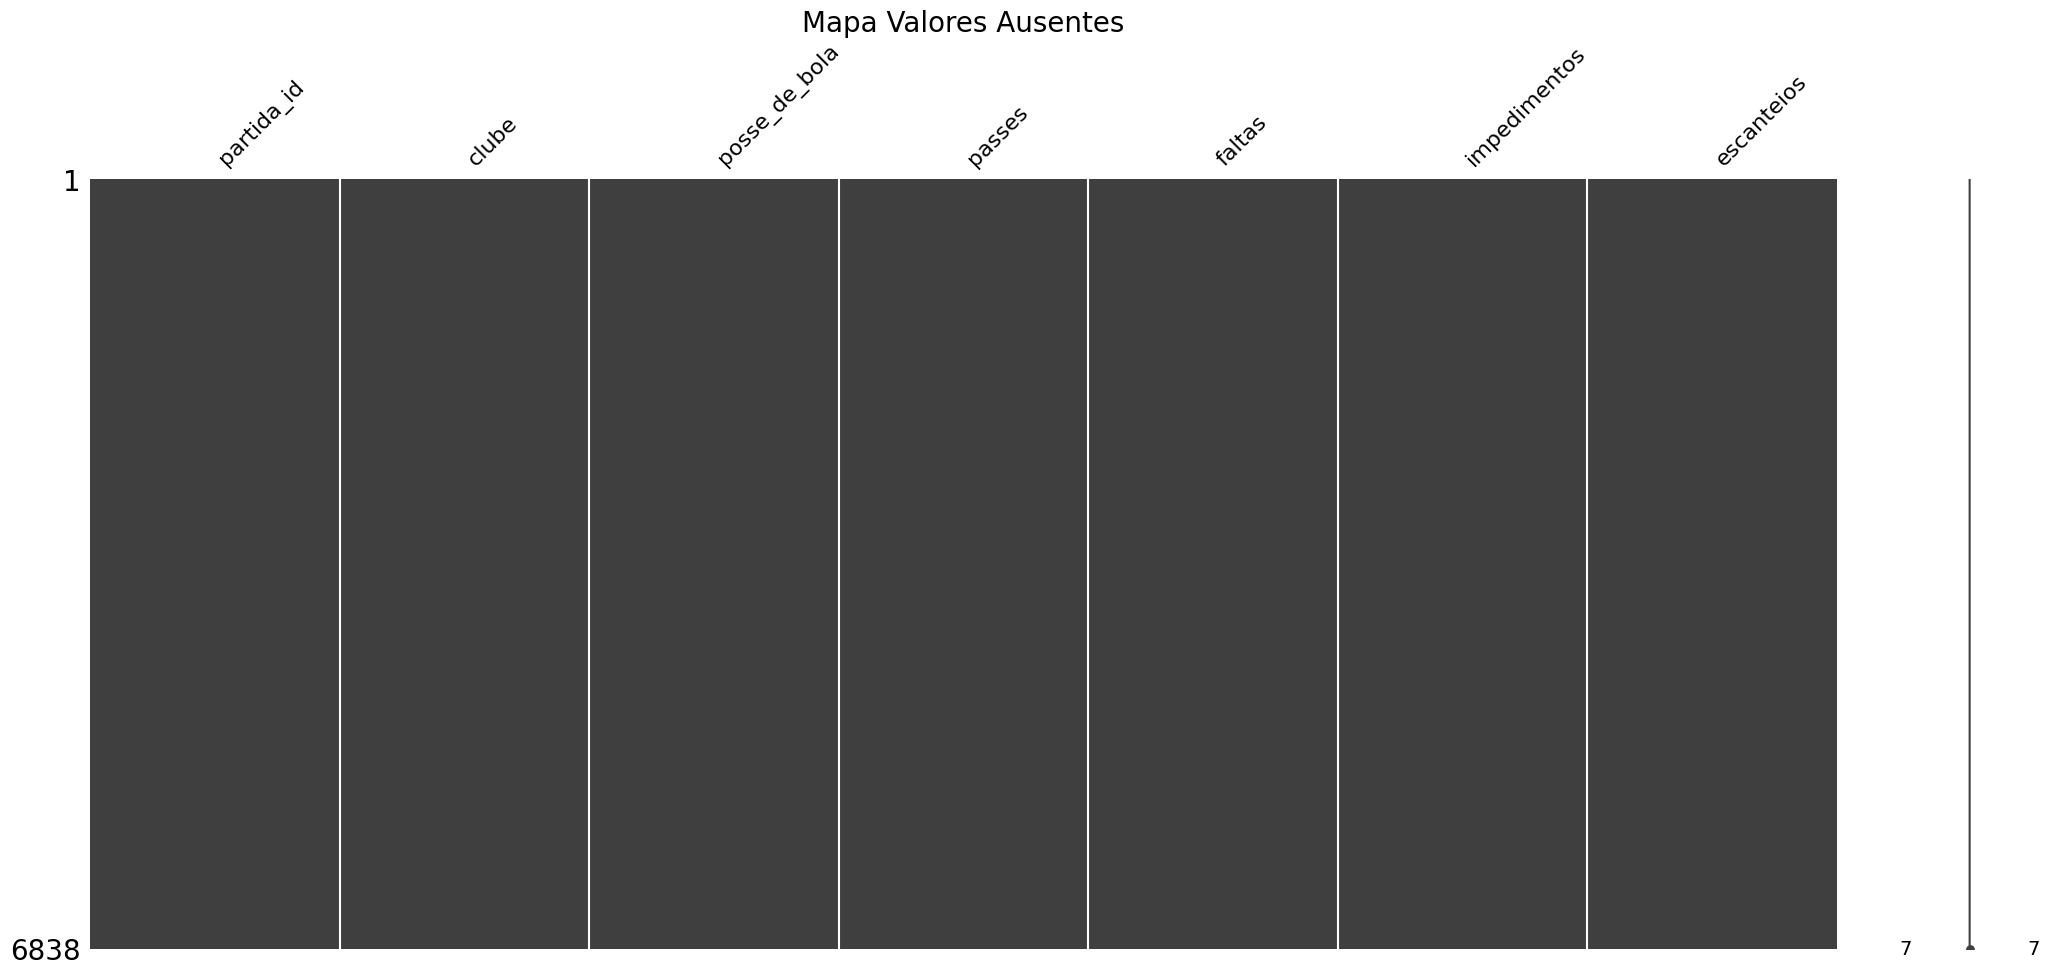

In [ ]:
msno.matrix(estatisticas)
plt.title("Mapa Valores Ausentes", fontsize = 20)
plt.show()

In [ ]:
gols.isnull().sum()

,0
partida_id,0
clube,0
atleta,0
minuto,0
tipo_de_gol,0


In [ ]:
gols.loc[gols['minuto'].str.startswith('90+'),'minuto'] = '90'
gols.loc[gols['minuto'].str.startswith('45+'),'minuto'] = '45'

In [ ]:
partidas.isnull().sum()

,0
partida_id,0
rodada,0
data,0
hora,0
mandante,0
visitante,0
tecnico_mandante,0
tecnico_visitante,0
vencedor,0
arena,0


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cartoes.to_csv('cartoes-2015-tratado.csv', index=False)
estatisticas.to_csv('estatisticas_partidas-2015-tratado.csv', index=False)
gols.to_csv('gols-2015-final.csv', index=False)
partidas.to_csv('partidas-2015-tratado.csv', index=False)

In [ ]:
from google.colab import files

files.download('cartoes-2015-tratado.csv')
files.download('estatisticas_partidas-2015-tratado.csv')
files.download('gols-2015-final.csv')
files.download('partidas-2015-tratado.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>